# About Dataset
* Dataset Overview
This dataset provides detailed information on website traffic, including page views, session duration, bounce rate, traffic source, time spent on page, previous visits, and conversion rate.

* Dataset Description
1. Page Views: The number of pages viewed during a session.
2. Session Duration: The total duration of the session in minutes.
3. Bounce Rate: The percentage of visitors who navigate away from the site after viewing only one page.
4. Traffic Source: The origin of the traffic (e.g., Organic, Social, Paid).
5. Time on Page: The amount of time spent on the specific page.
6. Previous Visits: The number of previous visits by the same visitor.
7. Conversion Rate: The percentage of visitors who completed a desired action (e.g., making a purchase).

* Data Summary
Total Records: 2000
Total Features: 7


* Key Features
1. Page Views: This feature indicates the engagement level of the visitors by showing how many pages they visit during their session.
2. Session Duration: This feature measures the length of time a visitor stays on the website, which can indicate the quality of the content.
3. Bounce Rate: A critical metric for understanding user behavior. A high bounce rate may indicate that visitors are not finding what they are looking for.
4. Traffic Source: Understanding where your traffic comes from can help in optimizing marketing strategies.
5. Time on Page: This helps in analyzing which pages are retaining visitors' attention the most.
6. Previous Visits: This can be used to analyze the loyalty of visitors and the effectiveness of retention strategies.
7. Conversion Rate: The ultimate metric for measuring the effectiveness of the website in achieving its goals.
Usage

This dataset can be used for various analyses such as:

1. Identifying key drivers of engagement and conversion.
2. Analyzing the effectiveness of different traffic sources.
3. Understanding user behavior patterns and optimizing the website accordingly.
4. Improving marketing strategies based on traffic source performance.
5. Enhancing user experience by analyzing time spent on different pages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


d:\New folder\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('C:/Users/lalit/Downloads/archive (2)/website_data.csv')

In [3]:
df.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [4]:
df.describe()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


In [6]:
df.shape

(2000, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


In [8]:
df.isnull().sum()

Page Views          0
Session Duration    0
Bounce Rate         0
Traffic Source      0
Time on Page        0
Previous Visits     0
Conversion Rate     0
dtype: int64

In [9]:
conversion_cnt = df['Conversion Rate'].value_counts().get(1.0,0)
conversion_cnt

1773

In [12]:
traffic = df.drop(['Traffic Source'],axis =1)

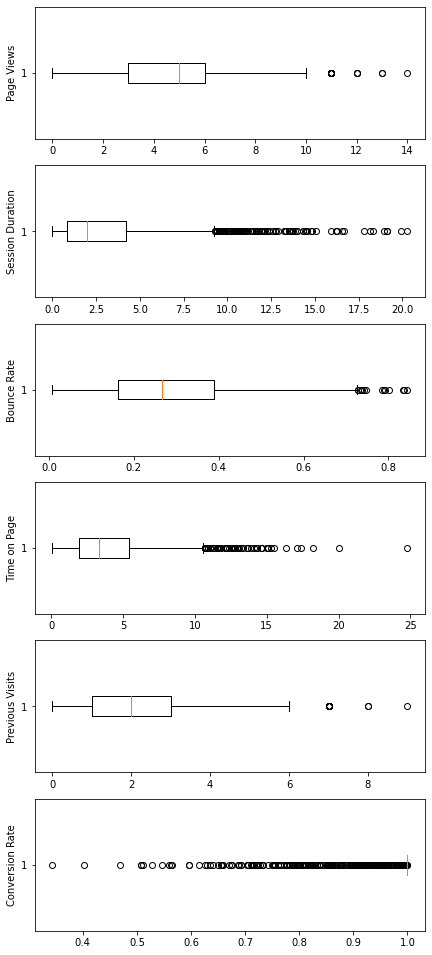

In [17]:
fig , axs = plt.subplots(6,1, figsize = (7,17))
i = 0
for col in traffic.columns:
    axs[i].boxplot(traffic[col],vert= False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

# Dropping Outliers

In [ ]:
# Page Views

q1 ,q3 = np.percentile(traffic['Page Views'], [25,75])

iqr = q3 -q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

traffic_cleaned = traffic[(traffic['Page Views'] >= lower_bound) & (traffic['Page Views'] <= upper_bound)]

In [20]:
# Session Duration

q1, q3 = np.percentile(traffic['Session Duration'], [25,75])

iqr = q3 - q1 
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

traffic_clean = traffic[(traffic['Session Duration'] >= lower_bound) & (traffic['Session Duration'] <= upper_bound)]


In [21]:
# Bounce Rate
q1, q3 = np.percentile(traffic['Bounce Rate'], [25, 75])
iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

traffic_clean = traffic[(traffic['Bounce Rate'] >= lower_bound) & (traffic['Bounce Rate'] <= upper_bound)]

In [22]:
# Time on Page

q1, q3 = np.percentile(traffic['Time on Page'], [25, 75])

iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

traffic_clean = traffic[(traffic['Time on Page'] >= lower_bound) & (traffic['Time on Page'] <= upper_bound)]

In [23]:
# Previous Visits

q1, q3 = np.percentile(traffic['Previous Visits'], [25, 75])

iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

traffic_clean = traffic[(traffic['Previous Visits'] >= lower_bound) & (traffic['Previous Visits'] <= upper_bound)]


In [24]:
#Conversion Rate
q1, q3 = np.percentile(traffic['Conversion Rate'], [25, 75])

iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
traffic_clean = traffic[(traffic['Conversion Rate'] >= lower_bound) & (traffic['Conversion Rate'] <= upper_bound)]


# Examining Correlations

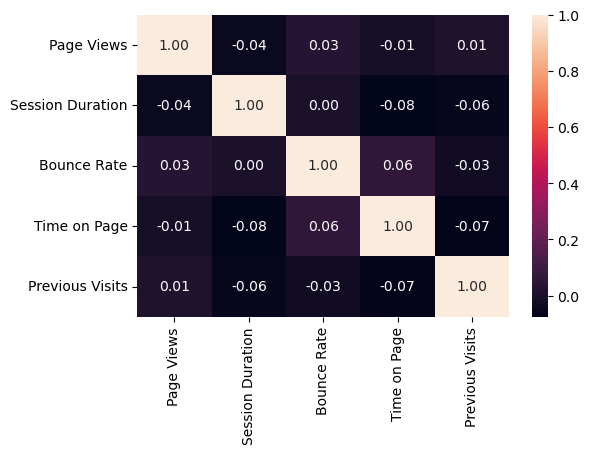

In [28]:
# Heat Map

corr = traffic_clean.drop('Conversion Rate', axis=1).corr()
plt.figure(dpi=100)
sns.heatmap(corr, annot=True, fmt= '.2f')
plt.show()

# Traffic Source Distribution

In [33]:
traffic_counts = df['Traffic Source'].value_counts()

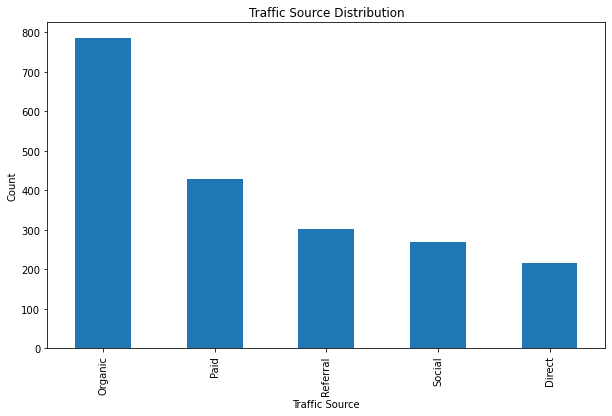

In [34]:
traffic_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Traffic Source Distribution')
plt.xlabel('Traffic Source')
plt.ylabel('Count')
plt.show()

# Relationship Between Session Duration And Bounce Rate

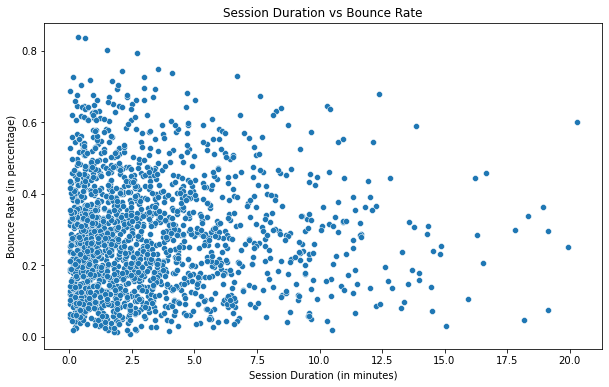

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Session Duration', y='Bounce Rate', data=traffic_clean)
plt.title('Session Duration vs Bounce Rate')
plt.xlabel('Session Duration (in minutes)')
plt.ylabel('Bounce Rate (in percentage)')
plt.show()


# Relationship Between Page Views And Session Duration 


In [38]:
page_views = traffic_clean['Page Views']
session_duration = traffic_clean['Session Duration']

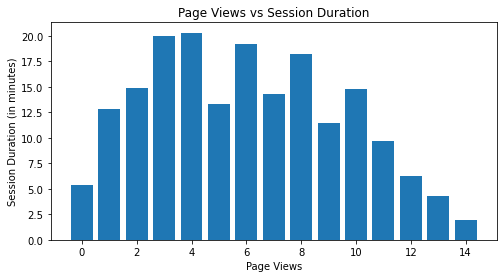

In [39]:
plt.figure(figsize=(8, 4))
plt.bar(page_views, session_duration)
plt.title('Page Views vs Session Duration')
plt.xlabel('Page Views')
plt.ylabel('Session Duration (in minutes)')
plt.show()

# Relationship Between Time On Page And Conversion Rate

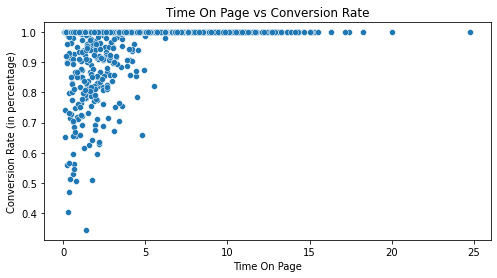

In [40]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Time on Page', y='Conversion Rate', data=traffic)
plt.title('Time On Page vs Conversion Rate')
plt.xlabel('Time On Page')
plt.ylabel('Conversion Rate (in percentage)')
plt.show()

# Relationship Between Time On Page And Bounce Rate

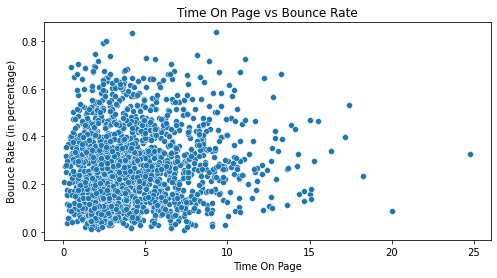

In [42]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Time on Page', y='Bounce Rate', data=traffic_clean)
plt.title('Time On Page vs Bounce Rate')
plt.xlabel('Time On Page')
plt.ylabel('Bounce Rate (in percentage)')
plt.show()

# Conclusion

* The dataset 'Website Traffic' is about 'Website Traffic and User Engagement Metrics'.
* As per the data source, the data is genrated and is not from a real website.
* The dataset have:
1. Total Rows: 2000
2. Total Columns: 7
3. Categorical Column(s): 1
4. Numerical Column(s): 6
* There are user engagement metrices of 1999 users.
* The dataset doesn't have any null values.
* The dataset have following datatypes respectively:
1. Page Views int64
2. Session Duration float64
3. Bounce Rate float64
4. Traffic Source object
5. Time on Page float64
6. Previous Visits int64
7. Conversion Rate float64

* The dataset is a well-maintained and clean, thus, it doesn't require much data cleaning.
* The maximum number of pages viewd during a session are 14, whereas the least is 0 pages.
* There are 5 types of Traffic Sources in the dataset.
* 1773 users, out of 1999, who converted from a vistor to a buyer.
* There were several outliers in all the numerical columns, which were removed.
* The status of correlations between various variables is as follows:
    * There is zero correlation between Session Duration and Bounce Rate.
    * There is no very strong positive or very strong negative correlation in the entire dataset.
* Most of the traffic on website is 'Organic' and least traffic is 'Direct'.
* The 'Relationship Between Session Duration And Bounce Rate' data visualization doesn't convey any insights as there is no correlation between the two at all.
* The 'Relationship Between Time On Page And Bounce Rate' data visualization doesn't convey any insights as there is no important correlation between the two.
* The 'Relationship Between Page Views and Session Duration' data visualization doesn't convey any insights as there is a very random pattern of trends in it.
* As per the 'Relationship Between Time On Page And Conversion Rate' dataviz, users who are on a specific website page for 5 to 15 minutes are most likely to be converted from a visitor to a buyer.